#  Exploratory Analysis for Real Estate Pricing
## The data preparation before leading up model training includes the follwoings: 
1. Exploratory Analysis
2. Data Cleaning
3. Feature Engineering  


##  Exploratory Analysis -  Get to know the dataset
1. Basic information
    - Use shape to display dataframe dimensions
    - Use dtypes to display the data types of features (Column datatypes)
    - use head/tail to display example of observations   
2. Distributions of dataset
    - Use describe to  display summary statistics for the numerical features 
    - Plot the histogram grid to understand the distributions
    - Use bar plots to visualize categorical features and identify sparse classes 
3.  Segmentations to observe the relationship between categorical features and numeric features 
    - Use groupby() to segment a categorical features and use agg() to calculate a metric e.g. mean, std
    - Use boxplot to segment the target variable by key 
    categorical features  
4. Correlations between numeric features  
    - Use corr() to calculate correlations between numeric features 
    - Plot correlation heatmaps 
    
## Data
- Will use the **real estate data** which contains 1883 rows and 26 variables to walk through the propcess of Exploratory Analysis
- The **tx_price** is the target variable 
- Input  : real_estate_data.csv

## Notes
- The Exploratory Analysis is one of the data preparations to predict the fair transaction price
- The module is adapted from Data Science Primer - Exploratory Analysis by EliteDataScience
  - Please refer to https://elitedatascience.com/exploratory-analysis

### Import package/library and load data

In [1]:

import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv( "real_estate_data.csv")

###  Basic information    

In [2]:
df.shape #  display dataframe dimensions

(1883, 26)

In [3]:
df.dtypes #  display column datatypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

In [4]:
df.head(10)  # Display first 10 observations

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,...,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,...,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002
5,265000,1,1,641,1947,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,...,60,52,28.0,15.0,86.0,168.0,58.0,8.0,3.0,2004
6,240000,1,1,642,1944,0,Single-Family,Brick,NaN,NaN,...,66,50,28.0,36.0,88.0,176.0,61.0,7.0,3.0,2011
7,388100,1,1,650,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,72,83,36.0,25.0,91.0,266.0,92.0,9.0,3.0,2005
8,240000,1,1,660,1983,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,...,32,41,36.0,49.0,77.0,188.0,65.0,6.0,3.0,2013
9,250000,1,1,664,1965,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,...,70,36,57.0,13.0,83.0,147.0,51.0,6.0,3.0,2007


In [5]:
df.tail(10)  # Display last 10 observations

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
1873,569000,5,5,7165,1991,43995,Single-Family,Brick,Wood Shake/ Shingles,1.0,...,3,6,49.0,82.0,68.0,1024.0,312.0,8.0,2.0,1994
1874,370000,5,5,7578,2008,87120,Single-Family,Siding (Alum/Vinyl),Composition Shingle,1.0,...,0,2,47.0,92.0,84.0,1045.0,318.0,9.0,3.0,2004
1875,235000,5,5,7594,2006,36154,Single-Family,Brick,Composition Shingle,1.0,...,5,2,52.0,85.0,57.0,1061.0,323.0,5.5,2.0,2006
1876,760000,5,5,7842,2003,436035,Single-Family,Combination,NaN,1.0,...,0,0,48.0,76.0,62.0,881.0,249.0,7.5,2.0,2008
1877,555000,5,5,8450,2004,91911,Single-Family,Other,Composition Shingle,1.0,...,3,3,35.0,91.0,85.0,1966.0,599.0,10.0,3.0,2003
1878,385000,5,6,6381,2004,224334,Single-Family,Stucco,Composition Shingle,1.0,...,0,1,46.0,76.0,87.0,1250.0,381.0,10.0,3.0,2002
1879,690000,5,6,6501,1956,23086,Single-Family,Brick,Composition Shingle,1.0,...,61,11,42.0,73.0,61.0,1553.0,473.0,9.0,3.0,2015
1880,600000,5,6,7064,1995,217800,Single-Family,Metal,Composition Shingle,1.0,...,1,2,43.0,87.0,66.0,942.0,287.0,8.0,1.0,1999
1881,759900,5,6,7500,2006,8886,Single-Family,Siding (Alum/Vinyl),Asphalt,1.0,...,8,6,43.0,61.0,51.0,803.0,245.0,5.0,2.0,2009
1882,735000,5,6,7515,1958,10497,Single-Family,Brick,Composition Shingle,1.0,...,0,5,37.0,80.0,86.0,1459.0,444.0,9.0,3.0,2015


###  Distributions of dataset
    - Use describe to display summary statistics for the numerical features 
    - Plot the histogram grid to understand the distributions
    - Use bar plots to visualize categorical features and identifysparse classes 

In [6]:
df.describe()  # Summarize numerical features

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,...,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,...,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,...,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,...,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,...,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,...,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,...,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


In [7]:
df.describe(include=['object']) # Summarize categorical features

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


#### Plot the histogram grid to understand the distributions and identify
- Distributions that are unexpected
- Potential outliers that don't make sense
- Features that should be binary 
- Boundaries that don't make sense
- Potential measurement errors



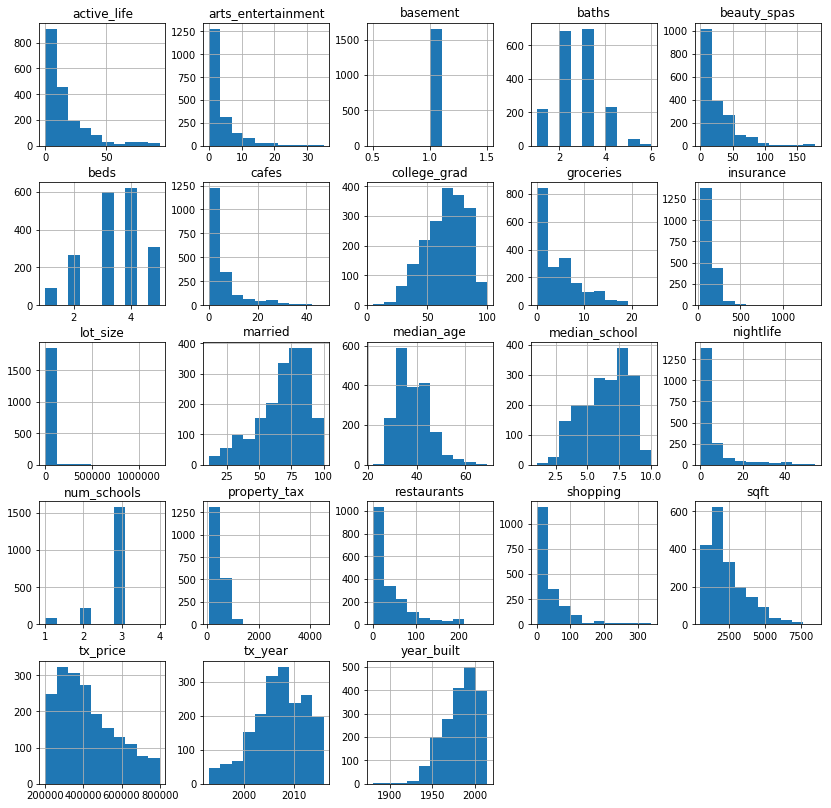

In [8]:
hist = df.hist(figsize=(14,14))

#### Plot bar plot for each categorical feature and identify sparse classes
- The "Concrete Bloc", "Concrete", "Block", "Wood Siding" are sparse classes in  exterior_wall

In [9]:
df ['exterior_walls'].unique()  # Show values of exterior_walls

array(['Wood Siding', 'Brick', 'Concrete Block', 'Wood',
       'Siding (Alum/Vinyl)', 'Stucco', 'Concrete', 'Block', nan, 'Metal',
       'Wood Shingle', 'Masonry', 'Brick veneer', 'Other', 'Combination',
       'Asbestos shingle', 'Rock, Stone'], dtype=object)

In [10]:

df['exterior_walls'].value_counts() # show counts of classes in  exterior_walls

Brick                  687
Siding (Alum/Vinyl)    503
Metal                  120
Combination            107
Wood                    72
Wood Siding             49
Brick veneer            48
Stucco                  26
Other                   10
Concrete                 8
Concrete Block           7
Block                    7
Asbestos shingle         6
Rock, Stone              5
Masonry                  3
Wood Shingle             2
Name: exterior_walls, dtype: int64

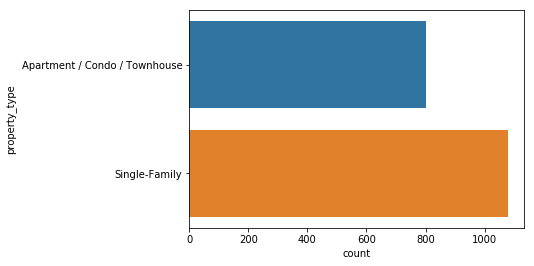

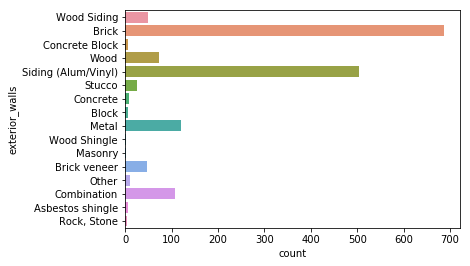

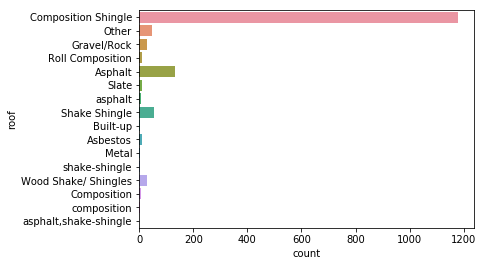

In [11]:

import seaborn as sns
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()
    

####  Segmentations to observe the relationship between categorical features and numeric features 
- Use groupby() to segment a categorical features and use agg() to calculate a metric e.g. mean, std
- Use boxplot to segment the target variable by key categorical features

In [12]:
df.groupby('property_type').mean() # Segment by property_type and display the means within each class

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
property_type,,,,,,,,,,,,,,,,,,,,,
Apartment / Condo / Townhouse,366614.034869,2.601494,2.200498,1513.727273,1988.936488,3944.239103,1.0,58.418431,5.919054,7.855542,...,32.087173,22.410959,37.199253,57.534247,66.372354,346.261519,105.652553,6.382316,2.831880,2007.941469
Single-Family,464644.711111,4.029630,2.862037,2935.865741,1978.523148,20417.666667,1.0,26.672222,3.453704,3.007407,...,16.970370,10.946296,39.643519,77.685185,64.128704,556.383333,166.329630,6.592593,2.764815,2006.494444


In [13]:
df.groupby('property_type').agg(['mean', 'std', 'max']) # Segment by property_type and display the mean, std, max within each class

tx_price                             beds  \
                                        mean            std     max      mean   
property_type                                                                   
Apartment / Condo / Townhouse  366614.034869  121784.490486  790830  2.601494   
Single-Family                  464644.711111  157758.739013  800000  4.029630   

                                                baths                \
                                    std max      mean       std max   
property_type                                                         
Apartment / Condo / Townhouse  0.810220   5  2.200498  0.815009   5   
Single-Family                  0.795639   5  2.862037  0.937551   6   

                                      sqft  ...  insurance median_school  \
                                      mean  ...        max          mean   
property_type                               ...                            
Apartment / Condo / Townhouse  1513.727273  ...      673.0      6.382316   
Single-Family                  2935.865741  ...     1374.0      6.592593   

                                              num_schools                 \
                                    std   max        mean       std  max   
property_type                                                              
Apartment / Condo / Townhouse  1.941998  10.0    2.831880  0.455370  4.0   
Single-Family                  2.031663  10.0    2.764815  0.537959  4.0   

                                   tx_year                  
                                      mean       std   max  
property_type                                               
Apartment / Condo / Townhouse  2007.941469  4.099487  2016  
Single-Family                  2006.494444  5.807059  2016  

[2 rows x 69 columns]

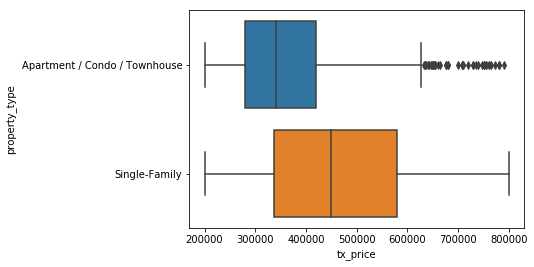

In [14]:
sns.boxplot(y='property_type', x='tx_price', data=df) # Segment tx_pric  by property_type 

###  Correlations between numeric features  
When plotting a heatmap of correlations, it's often helpful to do four things:

1. Change the background to white. This way, 0 correlation will show as white
2. Annotate the cell with their correlations values
3. Mask the top triangle (less visual noise)
4. Drop the legend (colorbar on the side)


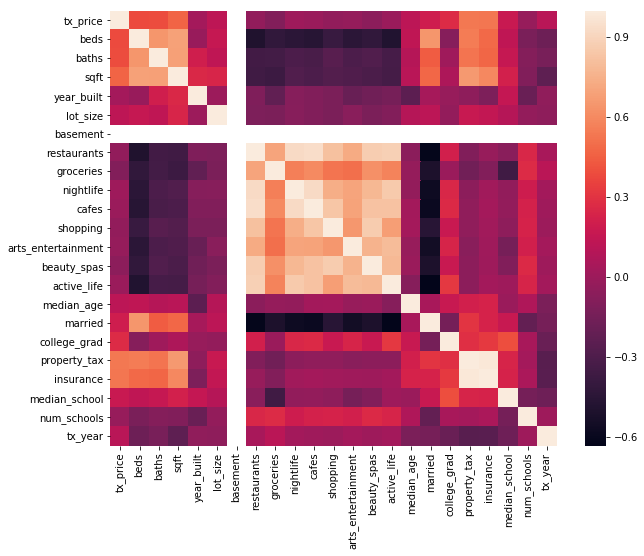

In [15]:
correlations = df.corr()  # Calculate correlations between numeric features and create a correlations dataframe from df.
plt.figure(figsize=(10, 8)) # Make the figsize 10 x 8
sns.heatmap(correlations) # Plot heatmap of  to visualize the correlation grid

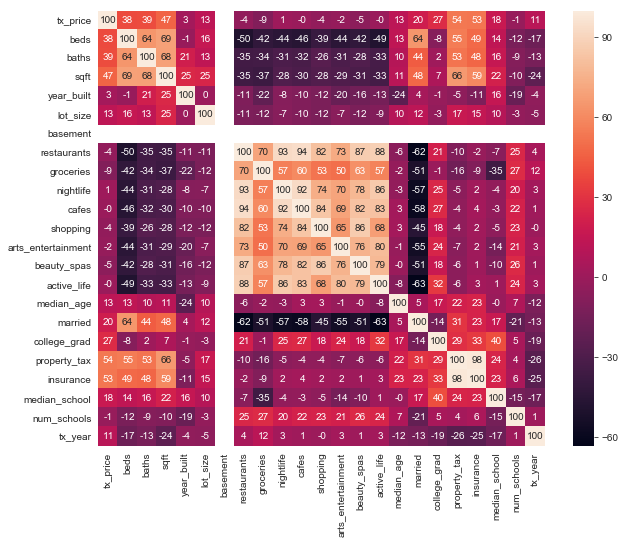

In [16]:
sns.set_style("white")      # change the background/color scheme to white; The theme will persist
plt.figure(figsize=(10, 8)) # Make the figsize 10 x 8; need to define before run SNS plot

sns.heatmap(correlations * 100, annot=True, fmt='.0f') # Plot heatmap of annotated correlations; fmt='.0f' to format the annotations to a whole number.


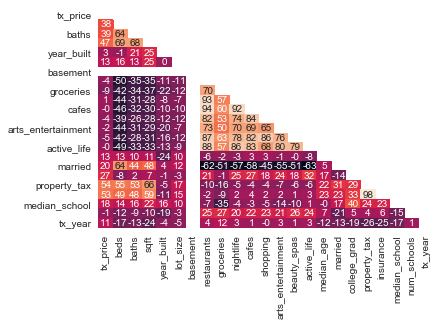

In [17]:
 
mask = np.zeros_like(correlations, dtype=np.bool) # Create a mask from correlations with all value = "False" 
# Create a mask from correlations with all value = "True" for element in the upper-triangle of arr (include diagonal and above the diagonal)  
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlations * 100, annot=True, fmt='.0f', mask=mask, cbar = False)